이전에 만들 모델에 샘플을 추가하려고 한다. 생선은 어느 생선이 먼저올지도 모르고 그렇다고 모든 생선이 올 때까지 기다릴 수도 없다. 어떻게 해야할까?

* 기존의 훈련 데이터에 새로운 데이터를 추가해 모델을 매일매일 다시 훈련한다.

이렇게 하면 매일 추가되는 새로운 데이터를 활용해 모델을 훈련할 수 있다. 하지만 시간이 지날수록 데이터가 늘어난다. 시간이 지날 수록 훈련하기위한 서버를 늘려야 할 것이다. 따라서 지속 가능한 방법은 아니다.

* 새로운 데이터를 추가할 때 이전 데이터를 버림으로써 훈련 데이터 크기를 일정하게 유지한다.

이렇게 하면 데이터셋의 크기가 너무 커지지 않을 수 있다. 하지만 데이터를 버릴 때 다른 데이터에 없는 중요한 생선 데이터가 포함되어 있다면 앞으로 모델이 그 생선을 제대로 예측하지 못할 수 있다.

* 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 훈련한다.

이런 훈련 방식을 **'점진적 학습'** 또는 **'온라인 학습'**이라고 부른다. 대표적인 점진적 학습 알고리즘은 **'확률적 경사 하강법(Stochastic Gradient Descent)'**이다.
사이킷런에서는 확률적 경사 하강법을 위한 클래스를 제공한다. 그럼 이 방식이 어떤 알고리즘이고, 왜 중요한지 알아보자.

확률적 경사 하강법에서 확률적이란 말은 '무작위하게' 혹은 '랜덤하게'의 기술적 표현이다. 경사는 '기울기'를 뜻하며 하강법은 '내려가는 방법'이다. 즉, **경사 하강법은 '내려가는 방법'을 의미**한다.

산에서 내려온다고 생각해보자. 집으로 돌아가려면 등산로 입구까지 내려가야 한다. 이때 **가장 빠른 길은 경사가 가장 가파른 길**이다.

경사 하강법이 바로 위와 같은 방식이다. 가장 가파른 경사를 따라 원하는 지점에 도달하는 것이 목표이다. 이때 가장 가파른 길을 찾아 내려오지만 **조금씩 내려오는 것이 중요**하다. 이렇게 **내려오는 과정이 바로 경사 하강법 모델을 훈련하는 것**이다.

이제 확률적이란 말을 이해해보자. 경사 하강법으로 내려올 때 가장 가파른 길을 찾는 방법은 무엇일까? 훈련 세트를 사용해  모델을 훈련하기 때문에 경사 하강법도 훈련 세트를 사용하여 가장 가파른 길을 찾는다. **이때 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는다.** 이처럼 훈련 세트에서 **랜덤하게 하나의 샘플을 고르는 것**이 바로 확률적 경사 하강법이다.

조금 더 자세히 설명하면, 확률적 경사 하강법은 훈련 세트에서 랜덤하게 하나의 샘플을 선택해 가파른 경사를 조금 내려간다. 그 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택해 경사를 조금 내려간다. 이런 식으로 전체 샘플을 모두 사용할 때까지 계속한다.

모든 샘플을 다 사용했는데도 산을 다 내려오지 못했다면 다시 처음부터 시작한다. 훈련 세트에 모든 샘플을 다시 채워 넣고 다시 랜덤하게 하나의 샘플을 선택해 이어서 경사를 내려간다. 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 **'에포크(epoch)'**라고 부른다. 일반적으로 경사 하강법은 수십, 수백 번 이상 에포크를 수행한다.

확률적 경사 하강법은 1개씩 무작위로 선택해 경사를 내려간다. 이때 여러 개의 샘플을 사용해 경사 하강법을 수행할 수도 있는데 이를 **'미니배치 경사 하강법(minibatch gradient descent)'**라고 한다. 극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용할 수도 있는데 이는 **'배치 경사 하강법(batch gradient descent)'**라고 부른다. 전체 데이터를 사용하기 때문에 가장 안정적인 방법일 수 있지만 전체 데이터를 사용하면 그만큼 컴퓨터 자원을 많이 사용하게 된다. 어떤 경우는 데이터가 너무 많아 한 번에 전체 데이터를 모두 읽을 수 없을지도 모른다.

정리하자면, 확률적 경사 하강법은 **훈련 세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동하는 알고리즘**이다. 이 때문에 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트되어도 학습을 계속 이어갈 수 있다. 즉, 다시 산꼭대기에서 시작할 필요가 없다.

근데 이때 산이라고 하는 것은 무엇일까? 바로 **'손실 함수(loss function)'**이다.

**'손실 함수(loss function)'**는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준이다. 손실 함수의 값은 작을수록 좋지만 어떤 값이 최솟값인지는 알지 못한다. 가능한 많이 찾아보고 만족할 수준이면 산을 다 내려왔다고 인정해야 한다.

우리가 다루는 많은 문제에 필요한 손실 함수는 이미 정의되어 있다. 그럼 생선을 분류하기 위해 어떤 손실 함수를 사용하는지 알아보자.

분류에서 손실은 확실하다. 정담을 못 맞히는 것이다. 도미와 빙어를 구분하는 이진 분류 문제를 예로 들어 보자. 도미는 양성 클래스(1), 빙어는 음성 클래스(0)라고 가정해 보자.

(예측) (정답)

1 ＝ 1

0 ≠ 1

0 ＝ 0

1 ≠ 0

위와 같은 예측과 정답이 있다고 가정하자.
정확도는 얼마일까? 2/4 이므로 0.5이다. 정확도를 손실함수로 사용할 수 있을까?
정확도에 음수를 취하면 -1.0이 가장 낮고 -0.0이 가장 높으므로 괜찮을 수 있다. 하지만 그림과 같이 4개의 샘플만 있다면 가능한 정확도는 0, 0.25, 0.5, 0.75, 1 다섯가지 뿐이다. **정확도가 듬성듬성하다면 경사 하강법을 이용해 조금씩 움직일 수 없다.** 산의 경사면은 연속적이어야 한다.

* 손실 함수는 미분 가능해야 한다.

이전 '로지스틱 회귀'에서 로지스틱 회귀 모델은 출력한 확률은 **0 ~ 1 어떤 값도 될 수 있었다. 즉, 연속적이다.** 위 샘플 4개의 예측 확률을 각각 0.9, 0.3, 0.2, 0.8이라 가정하자.

첫 번째 샘플의 예측은 0.9 이므로 **양성 클래스의 타깃인 1과 곱한 다음 음수로 바꿀 수 있다.** 이 경우 예측이 1에 가까울수록 좋은 모델이다. 예측이 1에 가까울수록 예측과 타깃의 곱의 음수는 점점 작아진다. 따라서 이 값을 손실 함수로 사용해도 괜찮다.

* 0.9 × 1 -> -0.9 (낮은 손실) [0.9가 예측 확률이다.]

두 번째 샘플의 예측은 아래와 같다.

* 0.3 × 1 -> -0.3 (높은 손실) [0.3이 예측 확률이다.]

세 번째 샘플을 보자. 이 샘플의 타깃은 음성 클래스(0)이다. 이 값을 예측 확률 0.2와 곱하면 무조건 0이 되므로 곤란하다. 이때 **타깃을 양성 클래스처럼 바꾸어 1로 만들고, 예측값도 양성 클래스에 대한 예측으로 바꾸면** 지금까지 했던 방식으로 값을 구할 수 있다.

* (1 - 0.2) * 1 -> -0.8 (낮은 손실) [0.8이 예측 확률이다.]

네 번째 샘플은 아래와 같다.

* (1 - 0.8) * 1 -> -0.2 (높은 손실) [0.2가 예측 확률이다.]

예측 확률을 이런 방식으로 계산하면 **연속적인 손실 함수**를 얻을 수 있다. 예측 확률에 **로그 함수를 적용**하면 더 좋다. 예측 확률의 범위는 0 ~ 1사이인데 로그 함수는 이 사이에서 음수가 되므로 최종 손실 값은 양수가 된다. 손실이 양수가 되면 이해하기 쉬워진다. 또 로그 함수는 0에 가까울수록 아주 큰 음수가 되므로 손실을 아주 크게 만들어 모델에 큰 영향을 미칠 수 있다.

* 타깃이 1일때: -log(예측 확률)
* 타깃이 0일때: -log(1 - 예측 확률)

이 손실 함수를 **'로지스틱 손실 함수(logistic loss function)'**또는 **'이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)'**이라고 부른다.

* **이 손실 함수를 이용하면 로지스틱 회귀 모델이 만들어진다.**

이진 분류에서는 로지스틱 손실 함수를 이용했지만 다중 분류에서는 **'크로스엔트로피 손실 함수(cross-entropy loss function)'**를 사용한다.

회귀에서는 손실 함수로 평균 절댓값 오차를 사용할 수 있고, **'평균 제곱 오차(mean squared error)'**를 많이 사용한다. 타깃에서 예측을 뺀 값을 제곱한 다음 모든 샘플에 평균한 값이다.

fish_scv_data 파일에서 판다스 데이터프레임을 만들어보자.

In [2]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


입력 데이터와 타깃 데이터로 나눈다.

In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

훈련 세트와 테스트 세트로 나눈다.

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

훈련 세트와 테스트 세트의 특성을 표준화 전처리한다. 
이때 **테스트 세트는 훈련 세트에서 학습한 통계 값으로 변환**해야한다.

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스는 **SGDClassifier**이다. sklearn.linear_model 패키지 아래있다.

In [6]:
from sklearn.linear_model import SGDClassifier

SGDClassifier의 객체를 만들 때 2개의 매개변수를 지정한다. loss는 손실 함수의 종류를 지정한다. loss = 'log'로 지정하면 로지스틱 손실 함수를 지정할 수 있다. max_iter는 수행할 에포크 획수를 지정한다. 10으로 지정하여 전체 훈련 세트를 10회 반복하고 훈련 세트와 테스트 세트의 정확도 점수를 출력해보자.

In [7]:
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


* 사이킷런은 모델이 충분히 수렴하지 않았다면 ConvergenceWarning 경고를 보낸다. 이러너 경고를 보면 max_iter 매개변수의 값을 늘려 주는 것이 좋다.

확률적 경사 하강법은 점진적 학습이 가능하다. SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 훈련해 보자. 모델을 이어서 훈련할 때는 **partial_fit() 메서드를 사용한다.** fit() 메서드와 사용법이 같지만 호출할 때마다 1 에포크씩 이어서 훈련할 수 있다. partial_fit() 메서드를 호출하고 다시 훈련 세트와 테스트 세트의 점수를 확인해 보자.

In [8]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


에포크를 한 번 더 실행하니 정확도가 향상되었다. 그럼 얼마나 더 훈련해야 할까? 이 기준에 대해 알아보자.

* train_scaled와 train_target을 한꺼번에 모두 사용했지만 SGDClassifier 객체에 한 번에 훈련 세트 전체를 전달해도 이 알고리즘은 **전달한 훈련 세트에서 1개씩 샘플을 꺼내 경사 하강법 단계를 수행**한다.

확률적 경사 하강법은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다. 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습하고 에포크 횟수가 많으면 훈련 세트를 완전히 학습한다. 즉, **에포크 횟수가 적을 때는 과소적합된 모델일 가능성이 높고, 많을 때는 과대적합된 모델일 가능성이 높다.**

훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작한다. 바로 이 지점이 모델이 과대적합되기 시작하는 곳이다. 과대적합이 시작하기 전에 훈련을 멈추는 것을 **'조기 종료(early stopping)'**라고 한다.

그럼 그래프를 그려보도록 하자.

In [11]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

* partial_fit() 메서드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해야 한다. 이를 위해 np.unique() 함수로 train_target에 있는 7개 생선의 목록을 만든다.

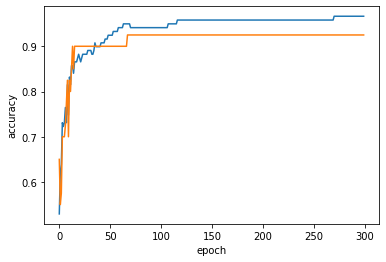

In [12]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

데이터가 작아 잘 드러나지 않지만, 백 번째 에포크 이후에 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있다. 즉, 백 번째 에포크가 적절한 반복 횟수이다.

그럼 SGDClassifier의 반복 횟수를 100에 맞추고 모델을 다시 훈련해 보자.

In [14]:
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다. tol 매개변수에서 향상될 최솟값을 지정한다. 우리는 자동으로 멈추지 않기위해 tol 매개변수를 None으로 지정하고 max_iter은 100으로 지정했다.

* SGDRegressor는 확률적 경사 하강법을 사용한 회귀 알고리즘을 제공한다. 사용법은 SGDClassifier와 동일하다.

참고로 loss에 대해 조금 알아보자.

loss 매개변수의 기본값은 **'hinge'**이다. **'힌지 손실(hinge loss)'**은 **'서포트 백터 머신(support vector machine)'**이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수이다. 일단 서포트 백터 머신이 널리 사용하는 머신러닝 알고리즘 중 하나라는 점과 SGDClassifier가 여러 종류의 손술 함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원하다는 것만 알아두자.

힌지 손실을 사용해 모델을 훈련해보자.

In [15]:
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


# 정리

핵심 포인트
* 확률적 경사 하강법: **훈련 세트에서 샘플 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘**이다. 샘플을 하나씩 사용하지 않고 여러 개를 사용하면 **미니배치 경사 하강법**, 한 번에 전체 샘플을 사용하면 **배치 경사 하강법**이 된다.
* 손실 함수: **확률적 경사 하강법이 최적화할 대상**이다. 이진 분류에서는 로지스틱 회귀(또는 이진 크로스엔트로피) 손실 함수를 사용한다. 다중 분류에서는 크로스엔트로프 손실 함수를 사용하고 회귀 문제에서는 평균 제곱 오차 손실 함수를 사용한다.
* 에포크: **확률적 경사 하강법에서 전체 샘플을 모두 사용하는 한 번 반복을 의미한다.** 일반적으로 경사 하강법 알고리즘은 수십에서 수백 번의 에포크를 반복한다.

핵심 패키지와 함수

scikit-learn
* SGDClassifier: **확률적 경사 하강법을 사용한 분류 모델을 만든다.** **loss 매개변수**는 최적화할 손실 함수를 지정하며 기본값은 'hinge' 손실 함수이다. 로지스틱 회귀를 위해서는 'log'로 지정한다. **penalty 매개변수**에서 규제의 종류를 지정한다. 기본값은 L2 규제를 위한 'l2'이고 L1 규제는 'l1'으로 지정한다. 규제 강도는 **alpha 매개변수**에서 지정한다. 기본값은 0.0001이다. **max_iter 매개변수**는 에포크 횟수를 지정하며 기본값은 1,000이다. **tol 매개변수**는 반복을 멈출 조건이며 **n_iter_no_change 매개변수**에서 지정한 에포크 동안 손실이 tol 만큼 줄어들지 않으면 알고리즘이 중단된다. tol 매개변수의 기본값은 0.001이고 n_iter_no_change 매개변수의 기본값은 5이다.